### Import Necessary Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading CSV File

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Cleaning up data
#### Removing all rows which have NaN value

In [3]:
df = df.dropna(how='any')

### Assignments

#### Question #1: Convert dates into a proper date-time format of your choice

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'])

#### Question #2: Finding seasons count from durations column

2.1 First find the 'season' word from duration column

In [5]:
df['duration'].str.find('Season')

7      -1
8       2
9      -1
12     -1
24     -1
       ..
8801   -1
8802   -1
8804   -1
8805   -1
8806   -1
Name: duration, Length: 5332, dtype: int64

2.2 Then add a new column named as 'seasons'

In [6]:
df['season'] = df['duration'].str.find('Season')

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",-1
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,-1
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,-1
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,-1


2.3 Seperate the 'min' from seasons and count the value of only seasons from season column

In [8]:
df[df['season'] != -1].count()

show_id         147
type            147
title           147
director        147
cast            147
country         147
date_added      147
release_year    147
rating          147
duration        147
listed_in       147
description     147
season          147
dtype: int64

#### Question #5: How many movies were released each year.

5.1 Get the all movies from type column and get into movie_result

In [9]:
movie_result = df[df['type'] == 'Movie']

5.2 And apply the groupby function on release_year column and calculate the count

In [10]:
movie_result.groupby(['release_year']).count()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,season
release_year,,,,,,,,,,,,
1942,1,1,1,1,1,1,1,1,1,1,1,1
1944,1,1,1,1,1,1,1,1,1,1,1,1
1945,1,1,1,1,1,1,1,1,1,1,1,1
1946,1,1,1,1,1,1,1,1,1,1,1,1
1947,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,640,640,640,640,640,640,640,640,640,640,640,640
2018,632,632,632,632,632,632,632,632,632,632,632,632
2019,495,495,495,495,495,495,495,495,495,495,495,495


#### Question #6: Which month is the best month to release it.

6.1 Add/Create the month column and take the month from date_added column

In [11]:
df['month'] = pd.DatetimeIndex(df['date_added']).month

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,month
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",-1,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,-1,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,-1,9
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,-1,9


6.2 Get the count of the released Movie or TV Show from release_year and groupby with month column

In [14]:
result = df[['month','show_id']].groupby(['month']).count()

In [15]:
result

,show_id
month,
1,489
2,341
3,469
4,471
5,368
6,415
7,464
8,449
9,427


6.3 And output with bar chart using matplotlib library

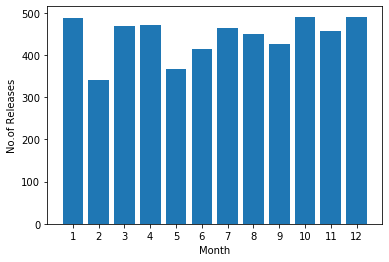

In [16]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, result['show_id'])
plt.xticks(months)
plt.ylabel("No.of Releases")
plt.xlabel("Month")
plt.show()

### Output in HTML File

In [17]:
df.to_html('output.html')